# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0001, E_test is 0.0112
Average number of iterations is 51.351.


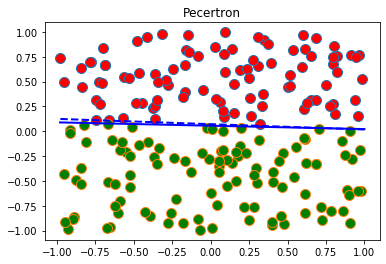

In [24]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 100; # number of training data

E_train = 0
E_test = 0
avgIter = 0

for i in range(nRep): 
    X, y, w_f = mkdata(nTrain+nTest)
    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
    
    w_g, iters = perceptron(X_train, y_train) # 
    
    # Compute training, testing error
#     y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train))))
#     y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test))))
#     E_train += np.sum(y_train != y_train_pred) / nTrain
#     E_test += np.sum(y_test != y_test_pred) / nTest
    E_train += 0.5 * np.sum(1 - np.sign(np.dot(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))) * y_train)) / X_train.shape[1]
    E_test += 0.5 * np.sum(1 - np.sign(np.dot(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))) * y_test)) / X_test.shape[1]

    # Sum up number of iterations
    avgIter += iters
    
# E_TRAIN
E_train /= nRep
E_test /= nRep
avgIter /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.2443, E_test is 0.2514
Average number of iterations is 2000.0.


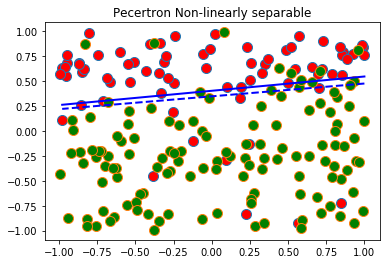

In [6]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 100; # number of training data

E_train = 0
E_test = 0
avgIter = 0

for i in range(nRep): 
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
    
    w_g, iters = perceptron(X_train, y_train) # 
    
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train))))
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test))))
    E_train += np.sum(y_train != y_train_pred) / nTrain
    E_test += np.sum(y_test != y_test_pred) / nTest
        
    # Sum up number of iterations
    avgIter += iters
    
# E_TRAIN
E_train /= nRep
E_test /= nRep
avgIter /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.0399, E_test is 0.0502


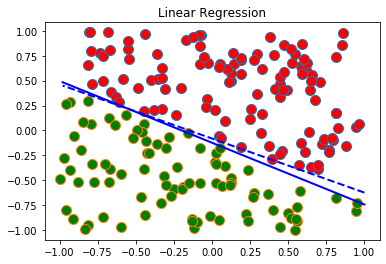

In [8]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 100; # number of training data

E_train = 0
E_test = 0

for i in range(nRep):
    
    X, y, w_f = mkdata(nTrain+nTest)
    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
    
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error
#     y_train_pred = np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train)))
#     y_test_pred = np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test)))
#     E_train += np.sum((y_train - y_train_pred)**2) / nTrain  
#     E_test += np.sum((y_test - y_test_pred)**2) / nTest

    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train))))
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test))))
    E_train += np.sum(y_train != y_train_pred) / nTrain
    E_test += np.sum(y_test != y_test_pred) / nTest
        
E_train /= nRep
E_test /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression')


## Part4: Linear Regression: noisy

E_train is 0.1321, E_test is 0.1428


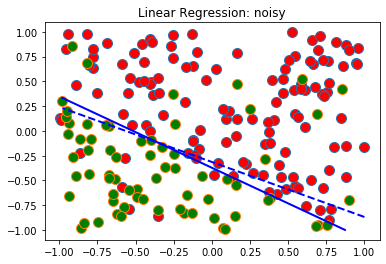

In [10]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 100; # number of training data

E_train = 0
E_test = 0

for i in range(nRep):
    
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
    
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error
#     y_train_pred = np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train)))
#     y_test_pred = np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test)))
#     E_train += np.sum((y_train - y_train_pred)**2) / nTrain  
#     E_test += np.sum((y_test - y_test_pred)**2) / nTest

    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train))))
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test))))
    E_train += np.sum(y_train != y_train_pred) / nTrain
    E_test += np.sum(y_test != y_test_pred) / nTest
        

E_train /= nRep
E_test /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression: noisy')

## Part5: Linear Regression: poly_fit

In [14]:
import scipy.io as sio

poly_train = sio.loadmat('poly_train')
X_train, y_train = poly_train['X'], poly_train['y']

poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']

In [15]:
w = linear_regression(X_train, y_train)

# Compute training, testing error
y_train_pred = np.matmul(w.T, np.vstack((np.ones((1, X_train.shape[1])), X_train)))
y_test_pred = np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))

E_train = np.sum((y_train - y_train_pred)**2) / X_train.shape[1]  
E_test = np.sum((y_test - y_test_pred)**2) / X_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.978404561354456, E_test is 1.0256475569026184


In [16]:
# poly_fit with transform
X_train_t = np.vstack((X_train[0], X_train[1], X_train[0]*X_train[1], X_train[0]**2, X_train[1]**2))  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test[0], X_test[1], X_test[0]*X_test[1], X_test[0]**2, X_test[1]**2))  # CHANGE THIS LINE TO DO TRANSFORMATION

w = linear_regression(X_train_t, y_train)

# Compute training, testing error
y_train_pred_t = np.matmul(w.T, np.vstack((np.ones((1, X_train.shape[1])), X_train_t)))
y_test_pred_t = np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test_t)))

E_train_t = np.sum((y_train - y_train_pred_t)**2) / X_train_t.shape[1]  
E_test_t = np.sum((y_test - y_test_pred_t)**2) / X_test_t.shape[1]

print('E_train_t is {:.4f}, E_test_t is {:.4f}'.format(E_train_t, E_test_t))

E_train_t is 0.3760, E_test_t is 0.3911


## Part6: Logistic Regression

E_train is 0.0000, E_test is 0.0139
Average number of iterations is 21.721.


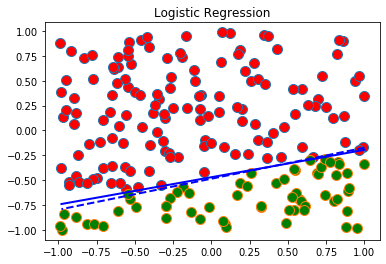

In [17]:
from logistic import logistic

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 100

E_train = 0
E_test = 0
avgIter = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    y = (y + 1) / 2 # Since logistic regression outputs 0/1, we should adjust the label y.

    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
    
    w_g, iters = logistic(X_train, y_train)
    
    # Compute training, testing error

#     y_train_pred = 1 / (1 + np.exp(-1 * np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train)))))
#     y_train_pred[y_train_pred>=0.5] = 1
#     y_train_pred[y_train_pred<0.5] = 0 

#     y_test_pred = 1 / (1 + np.exp(-1 * np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test)))))
#     y_test_pred[y_test_pred>=0.5] = 1
#     y_test_pred[y_test_pred<0.5] = 0 

    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train))))
#     y_train_predd = (y_train_pred + 1) / 2 
    y_train_pred[y_train_pred==-1] = 0 
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test))))
#     y_test_pred = (y_test_pred + 1) / 2
    y_test_pred[y_test_pred==-1] = 0
    
    E_train += np.sum(y_train != y_train_pred) / nTrain
    E_test += np.sum(y_test != y_test_pred) / nTest
        
    # Sum up number of iterations
    avgIter += iters
    
    y = y * 2 - 1 # adjust label y back to -1/1
    
# E_TRAIN
E_train /= nRep
E_test /= nRep
avgIter /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.2264, E_test is 0.2384
Average number of iterations is 3000.0.


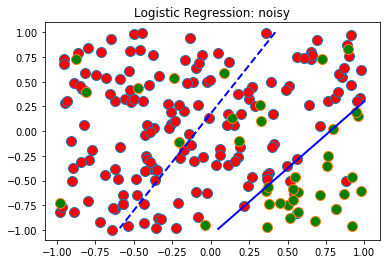

In [19]:
from logistic import logistic

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 100

E_train = 0
E_test = 0
avgIter = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    y = (y + 1) / 2 # Since logistic regression outputs 0/1, we should adjust the label y.

    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
    
    w_g, iters = logistic(X_train, y_train)
    
    # Compute training, testing error

    y_train_pred = 1 / (1 + np.exp(-1 * np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train)))))
    y_train_pred[y_train_pred>=0.5] = 1
    y_train_pred[y_train_pred<0.5] = 0 

    y_test_pred = 1 / (1 + np.exp(-1 * np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test)))))
    y_test_pred[y_test_pred>=0.5] = 1
    y_test_pred[y_test_pred<0.5] = 0 
        
    
    E_train += np.sum(y_train != y_train_pred) / nTrain
    E_test += np.sum(y_test != y_test_pred) / nTest
        
    # Sum up number of iterations
    avgIter += iters
    
    y = y * 2 - 1 # adjust label y back to -1/1
    
# E_TRAIN
E_train /= nRep
E_test /= nRep
avgIter /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')


## Part8: SVM

E_train is 0.0000, E_test is 0.0108
Average number of support vectors is 2.999.


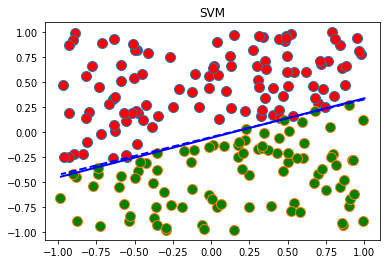

In [21]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 100

E_train = 0
E_test = 0
avgNum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
        
    w_g, num = svm(X_train, y_train)
    
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train))))
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test))))
    E_train += np.sum(y_train != y_train_pred) / nTrain
    E_test += np.sum(y_test != y_test_pred) / nTest

    avgNum += num
    
# E_TRAIN
E_train /= nRep
E_test /= nRep
avgNum /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.5548, E_test is 0.5556
Average number of support vectors is 0.002.


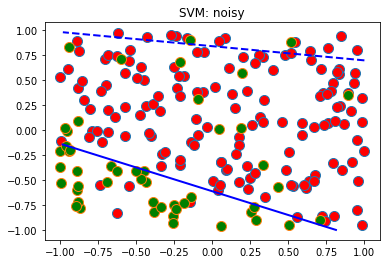

In [22]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 100

E_train = 0
E_test = 0
avgNum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_train, X_test = X[:, :nTrain], X[:, nTrain:]
    y_train, y_test = y[:, :nTrain], y[:, nTrain:]
        
    w_g, num = svm(X_train, y_train)
    
    # Compute training, testing error
    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTrain)), X_train))))
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, nTest)), X_test))))
    E_train += np.sum(y_train != y_train_pred) / nTrain
    E_test += np.sum(y_test != y_test_pred) / nTest

    avgNum += num
    
# E_TRAIN
E_train /= nRep
E_test /= nRep
avgNum /= nRep

print('E_train is {:.4f}, E_test is {:.4f}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM: noisy')